<a href="https://www.kaggle.com/code/sejalhanmante/vehicle-price-prediction-sejal-hanmante?scriptVersionId=184749752" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-sales-data/car_prices.csv


In [60]:
df = pd.read_csv(r"/kaggle/input/vehicle-sales-data/car_prices.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Replacing null values for transmission column**

In [61]:
temp = df.loc[df['make'].notna() & df['trim'].notna() & df['transmission'].notna(), ['make', 'trim', 'transmission']].groupby(['make', 'trim']).agg({'transmission' :(lambda x :pd.Series.mode(x)[0])}).reset_index()

temp

,make,trim,transmission
0,Acura,2.2,automatic
1,Acura,2.2 Premium,automatic
2,Acura,2.3,automatic
3,Acura,2.3 Premium,automatic
4,Acura,2.5,automatic
...,...,...,...
2325,vw,s,automatic
2326,vw,se,automatic
2327,vw,se w/nav,automatic
2328,vw,se w/rse,automatic


In [62]:
def hand_trans(x):
    t = temp.loc[(x['make'] == temp['make']) & (x['trim'] == temp['trim']), 'transmission'].values
    if len(t) == 0:
        return np.nan
    else:
        return t[0]
        

In [63]:
df.loc[df['make'].notna() & df['trim'].notna() & df['transmission'].isna(), 'transmission'] = df.loc[df['make'].notna() & df['trim'].notna() & df['transmission'].isna(), ['make', 'trim', 'transmission']].apply(lambda x : hand_trans(x), axis = 1)

In [64]:
df.loc[35]

year                                                         2014
make                                                        Buick
model                                                      Verano
trim                                            Convenience Group
body                                                        Sedan
transmission                                            automatic
vin                                             1g4pr5sk8e4175320
state                                                          ca
condition                                                     2.0
odometer                                                  19531.0
color                                                        gray
interior                                                     gray
seller          enterprise vehicle exchange / tra / rental / t...
mmr                                                       15000.0
sellingprice                                               9200.0
saledate  

In [65]:
df['transmission'].isnull().sum()

1947

In [66]:
df['transmission'].dropna(how="all",inplace=True)

In [67]:
df["transmission"].isnull().sum()

1947

In [68]:
df = df.loc[df["transmission"].notna()]
df.shape

(556890, 16)

In [69]:
df.shape

(556890, 16)

# Data preprocessing

In [70]:
df.isnull().sum()

year                0
make             8540
model            8638
trim             8856
body            11275
transmission        0
vin                 4
state               0
condition       11765
odometer           93
color             744
interior          744
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [71]:
df.isnull().sum() * 100 / df.shape[0]

year            0.000000
make            1.533516
model           1.551114
trim            1.590260
body            2.024637
transmission    0.000000
vin             0.000718
state           0.000000
condition       2.112625
odometer        0.016700
color           0.133599
interior        0.133599
seller          0.000000
mmr             0.006824
sellingprice    0.002155
saledate        0.002155
dtype: float64

In [72]:
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

Removing unnecesarry columns

In [73]:
#df.drop(["vin"],axis=1,inplace=True)
#df.drop(["saledate"],axis=1,inplace=True)

**Replacing null values**

In [74]:
df["condition"].fillna(df["condition"].mean(),inplace=True)
df["odometer"].fillna(df["odometer"].mean(),inplace=True)
df["mmr"].fillna(df["mmr"].mean(),inplace=True)
df["sellingprice"].fillna(df["sellingprice"].mean(),inplace=True)


/tmp/ipykernel_35/1931646264.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["condition"].fillna(df["condition"].mean(),inplace=True)
/tmp/ipykernel_35/1931646264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [75]:
df.isnull().sum()

year                0
make             8540
model            8638
trim             8856
body            11275
transmission        0
vin                 4
state               0
condition           0
odometer            0
color             744
interior          744
seller              0
mmr                 0
sellingprice        0
saledate           12
dtype: int64

In [76]:
df["color"].fillna(df["color"].mode()[0],inplace=True)
df["interior"].fillna(df["interior"].mode()[0],inplace=True)
#df["transmission"].fillna(df["transmission"].mode()[0],inplace=True)
df["body"].fillna(df["body"].mode()[0],inplace=True)
df["trim"].fillna(df["trim"].mode()[0],inplace=True)

/tmp/ipykernel_35/265650103.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["color"].fillna(df["color"].mode()[0],inplace=True)
/tmp/ipykernel_35/265650103.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [77]:
df.isnull().sum()

year               0
make            8540
model           8638
trim               0
body               0
transmission       0
vin                4
state              0
condition          0
odometer           0
color              0
interior           0
seller             0
mmr                0
sellingprice       0
saledate          12
dtype: int64

In [78]:
df["make"].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'Rolls-Royce', 'gmc', 'maserati',
       'mazda tk', 'mercury', 'audi', 'buick', 'mercedes-b', 'Daewoo',
       'chev truck', 'ford tk', 'plymouth',

In [79]:
df["model"].unique()

array(['Sorento', '3 Series', 'S60', '6 Series Gran Coupe', 'Altima',
       'M5', 'Cruze', 'A4', 'Camaro', 'A6', 'Optima', 'Fusion', 'Sonata',
       'Q5', '6 Series', 'Impala', '5 Series', 'A3', 'XC70', 'X5', 'SQ5',
       'S5', 'Verano', 'Suburban', 'ELR', 'V60', 'X6', 'ILX', 'K900',
       'Malibu', 'RX 350', 'Versa', 'Elantra', 'Versa Note', 'A8', 'X1',
       nan, 'Enclave', 'TTS', '4 Series', 'Silverado 2500HD', 'MDX',
       'Silverado 1500', 'SRX', 'G Coupe', 'G Sedan', 'FX', 'Santa Fe',
       'Genesis', 'Equus', 'Sonata Hybrid', 'Accent', 'Veloster',
       'Elantra Coupe', 'Azera', 'Tucson', 'Genesis Coupe', 'Wrangler',
       'S-Class', 'GS 350', 'Outlander', 'C-Class', 'Mazda2', 'Rio', 'M',
       '370Z', 'Soul', 'Outlander Sport', 'SLK-Class', 'ES 350',
       'E-Class', 'Mazda3', 'Cooper Clubman', 'Cooper', 'CX-9', 'Forte',
       'Compass', 'JX', 'RX 450h', 'LR4', 'Mazda5', 'Range Rover Evoque',
       'LS 460', 'GLK-Class', 'Sportage', 'Grand Cherokee', 'MKX', 'mkt',


In [80]:
df.dropna(inplace=True)

In [81]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [82]:
df.shape

(548236, 16)

# EDA

In [83]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Timeline of Vehicle Manufacturing**

<Axes: xlabel='year', ylabel='count'>

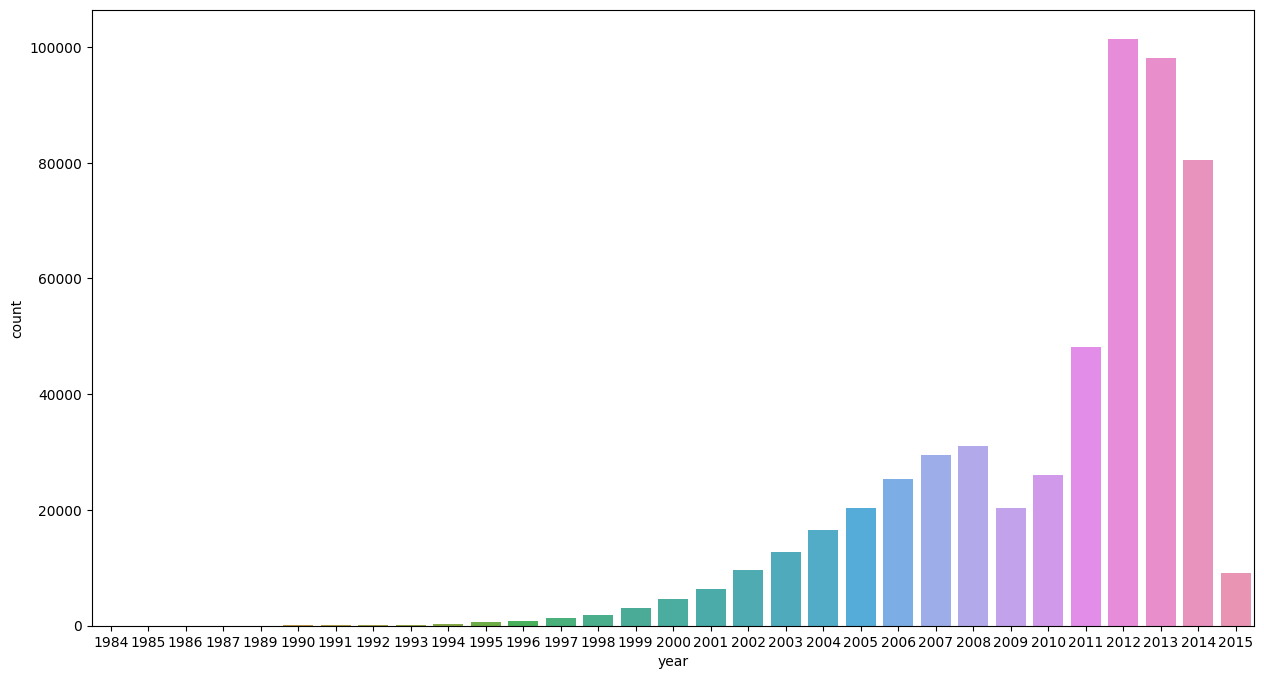

In [84]:
plt.figure(figsize=(15,8))
sns.countplot(x="year",data=df)

**Number of vehicles sold according to Make**

In [85]:
yrsell= df.groupby("make")["year"].count().nlargest(10)
yrsell

make
Ford         93552
Chevrolet    60197
Nissan       53941
Toyota       39871
Dodge        30708
Honda        27206
Hyundai      21811
BMW          20632
Kia          18075
Chrysler     17274
Name: year, dtype: int64

In [86]:
px.line(yrsell)

**Top seller model by each Brand**

In [87]:
top=df.groupby(["make",'model'])["body"].count().nlargest(20).reset_index().drop_duplicates(['make'])
top

,make,model,body
0,Nissan,Altima,19348
1,Ford,F-150,14479
3,Toyota,Camry,12545
6,Honda,Accord,9127
7,BMW,3 Series,8204
8,Dodge,Grand Caravan,7941
9,Chevrolet,Impala,7923
12,Infiniti,G Sedan,7417
15,Hyundai,Sonata,6912


In [88]:
fig=px.histogram(top,x="model",y="body",color="make",title="Top seller model by each brand")
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [89]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


**Vehicle color selling pattern**

In [90]:
color = df.groupby("color")['year'].count().nlargest(5)
color

color
black     109789
white     104231
silver     81843
gray       81813
blue       50037
Name: year, dtype: int64

([<matplotlib.patches.Wedge at 0x7891efead3c0>,
 [Text(0.7613030930771341, 0.7939884133104139, 'black'),
  Text(-0.7949020921826743, 0.7603490407987684, 'white'),
  Text(-0.9056607509405685, -0.6243225161771485, 'silver'),
  Text(0.25593369851793046, -1.0698121059153018, 'gray'),
  Text(1.0265408531974045, -0.39523901213916757, 'blue')],
 [Text(0.41525623258752764, 0.4330845890784075, '25.7%'),
  Text(-0.43358295937236774, 0.41473584043569184, '24.4%'),
  Text(-0.49399677324031, -0.34053955427844457, '19.1%'),
  Text(0.1396001991915984, -0.583533875953801, '19.1%'),
  Text(0.5599313744713115, -0.2155849157122732, '11.7%')])

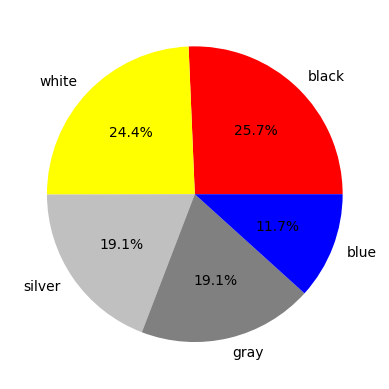

In [91]:
plt.pie(color,labels=color.index,colors=["red","yellow","silver","gray","blue"],autopct='%1.1f%%')

**Avg condition acc. to make  of vehicle**

In [92]:
cond=df.groupby('make')["condition"].mean().nlargest(5)
cond

make
Lamborghini     43.750000
Ferrari         37.578947
smart           37.407883
maserati        37.333333
Aston Martin    35.920000
Name: condition, dtype: float64

<Axes: xlabel='make'>

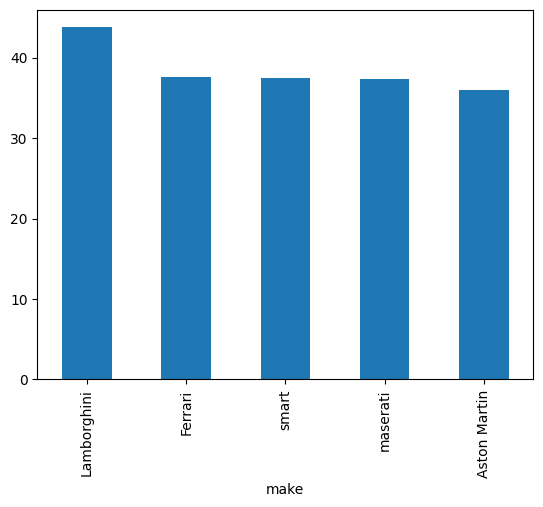

In [93]:
cond.plot(kind="bar")

**Highest selling models**

In [94]:
highsell = df.groupby("model")["sellingprice"].mean().nlargest(5)
highsell

model
458 Italia     183000.000000
SLS AMG GT     156500.000000
i8             154222.222222
Flying Spur    154000.000000
Ghost          153488.235294
Name: sellingprice, dtype: float64

In [95]:
px.line(highsell)

<Axes: xlabel='model'>

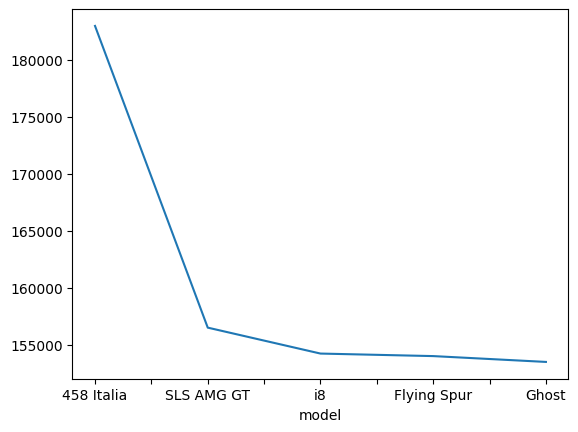

In [96]:
highsell.plot(kind="line")

**Lowest selling vehicles**

In [97]:
lowsell = df.groupby("model")["sellingprice"].mean().nsmallest(5)
lowsell

model
Paseo             150.00
Windstar Cargo    281.25
300e              300.00
Leganza           300.00
Regency           300.00
Name: sellingprice, dtype: float64

In [98]:
px.bar(lowsell,color=["white","yellow","green","blue","red"])

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [99]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# Selling price based on the odometer value

In [100]:
odometer =df.groupby("odometer")["sellingprice"].mean()
px.line(odometer)

# Most selling car interior colors

In [101]:
interior = df.groupby("interior")["make"].count()
interior

interior
beige         58583
black        241507
blue           1069
brown          8458
burgundy        187
gold            315
gray         174517
green           234
off-white       480
orange          136
purple          333
red            1321
silver         1080
tan           43093
white           247
yellow           20
—             16656
Name: make, dtype: int64

In [102]:
px.line(interior)

In [103]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# Model development

In [104]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [105]:
final_df = df.dropna()
final_df = df.drop(["saledate"],axis=1)
final_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0


In [106]:
final_df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
dtype: int64

In [107]:
final_df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0


In [108]:
final_df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice'],
      dtype='object')

In [109]:
final_df.dropna()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0


In [110]:
final_df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice'],
      dtype='object')

In [111]:
x= final_df[['year','condition', 'odometer','mmr','sellingprice']]
x

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
4,2014,43.0,2641.0,66000.0,67000.0
...,...,...,...,...,...
558832,2015,45.0,18255.0,35300.0,33000.0
558833,2012,5.0,54393.0,30200.0,30800.0
558834,2012,48.0,50561.0,29800.0,34000.0
558835,2015,38.0,16658.0,15100.0,11100.0


In [112]:
x1= final_df.drop(["sellingprice"],axis=1)
y1=final_df["sellingprice"]

In [113]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y,test_y = train_test_split(x1 , y1 ,test_size=0.3, random_state=42)
train_X.shape , test_X.shape , train_y.shape, test_y.shape

((383765, 14), (164471, 14), (383765,), (164471,))

# One Hot Enoding

In [114]:
final_df.dropna(inplace=True)

In [115]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
encoder_df = pd.DataFrame(enc.fit_transform(final_df[['make', 'model','body', 'transmission', 'state','color', 'interior']]).toarray())

In [116]:
encoder_df

,0,1,2,3,4,5,6,7,8,9,...,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548233,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
X = pd.merge(x,encoder_df,left_index=True,right_index=True)


In [118]:
X = X[0:5000]

In [119]:
X_final = X.drop(["sellingprice"],axis=1)
y=X["sellingprice"]

In [120]:
X_final.shape , y.shape

((5000, 1264), (5000,))

# Train Test Split



In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train , X_test , y_train, y_test = train_test_split(X_final , y ,test_size=0.3, random_state=42)
X_train.shape , X_test.shape , y_train.shape, y_test.shape

((3500, 1264), (1500, 1264), (3500,), (1500,))

In [123]:
X_train = X_train.values

In [124]:
X_test = X_test.values


In [125]:
y_train = y_train.values


In [126]:
y_test = y_test.values

# Linear Regression 


In [127]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [128]:
lr.fit(X_train, y_train)

LinearRegression()

In [129]:
y_pred = lr.predict(X_test)
y_pred.shape, y_test.shape



((1500,), (1500,))

In [130]:
y_pred[:10]

array([29550.65577503, 17997.58465101, 10525.66918719,  8451.64304249,
       11365.01372399, 64664.4588376 , 16184.32331053,  7119.20057578,
       32288.63816874, 12361.86261617])

In [131]:
lr_train_score = lr.score(X_train, y_train) *100
lr_train_score

95.95220801555402

In [132]:
lr_test_score = lr.score(X_test, y_test) *100
lr_test_score

95.92494859370558

r2 score


In [133]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9592494859370558

# KNN REGRESSOR

In [134]:
from sklearn.neighbors import KNeighborsRegressor

In [135]:
knn = KNeighborsRegressor(n_neighbors=5,metric='manhattan')
knn

KNeighborsRegressor(metric='manhattan')

In [136]:
knn.fit(X_train,y_train)

KNeighborsRegressor(metric='manhattan')

In [137]:
knn.predict(X_test)

array([27200., 17880.,  9360., ..., 13960., 10370., 20280.])

In [138]:
knn_train_score = knn.score(X_train,y_train) *100
knn_train_score

95.7131306829977

In [139]:
knn_test_score = knn.score(X_test,y_test) *100
knn_test_score

92.83336938993996

# SVM REGRESSOR

In [140]:
from sklearn.svm import SVR

In [141]:
model1 = SVR(C=200)
model1

SVR(C=200)

In [142]:
model1.fit(X_train,y_train)

SVR(C=200)

In [143]:
model1.predict(X_test)

array([24517.35632429, 18037.5627163 ,  9495.04025352, ...,
       16068.80418272, 12911.26667881, 19566.41054324])

In [144]:
svm_train_score =model1.score(X_train,y_train) *100
svm_train_score

82.34196493334905

In [145]:
svm_test_score =model1.score(X_test,y_test) *100
svm_test_score

75.21972198983671

# DECISION TREE REGRESSOR

In [146]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [147]:
dt_train_score = dt.score(X_train,y_train) *100
dt_test_score =dt.score(X_test,y_test) *100
dt_train_score , dt_test_score

(100.0, 91.89137258987598)

# Hyper-parameter tuning for Decision Trees
**GRID SEARCH CV**

In [148]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {"max_depth": [10, None],
              "max_features": [1, 3, 25],
              "min_samples_split": [2, 3, 25],
              "criterion": ["absolute_error","poisson"]
}

In [149]:
gridsearchcv=GridSearchCV(dt,param_grid=param_grid,cv=5)
gridsearchcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['absolute_error', 'poisson'],
                         'max_depth': [10, None], 'max_features': [1, 3, 25],
                         'min_samples_split': [2, 3, 25]})

In [150]:
gridsearchcv.best_score_

0.5029597239718486

In [151]:
final = gridsearchcv.best_estimator_
final


DecisionTreeRegressor(criterion='poisson', max_features=25, min_samples_split=3)

# Random Forest Regressor

In [152]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [153]:
rf_train_score =rf.score(X_train,y_train) *100
rf_test_score =rf.score(X_test,y_test) *100
rf_train_score , rf_test_score

(99.33776690625575, 94.17235132017831)

# RandomSearchCV for Random Forest 

In [154]:
"""parameter_grid = { 'criterion' : ["squared_error", "absolute_error"],
                  'max_depth' :[3,7,10],
                  'min_samples_split' :[6,7,8] , 
                  'n_estimators' : [10,20,20]
                  
}"""

'parameter_grid = { \'criterion\' : ["squared_error", "absolute_error"],\n                  \'max_depth\' :[3,7,10],\n                  \'min_samples_split\' :[6,7,8] , \n                  \'n_estimators\' : [10,20,20]\n                  \n}'

In [155]:
"""randomsearchcv=RandomizedSearchCV(rf,param_distributions=parameter_grid,n_iter=3,cv=5)
randomsearchcv.fit(X_train,y_train)"""

'randomsearchcv=RandomizedSearchCV(rf,param_distributions=parameter_grid,n_iter=3,cv=5)\nrandomsearchcv.fit(X_train,y_train)'

In [156]:
"""randomsearchcv.best_score_"""


'randomsearchcv.best_score_'

In [157]:
d1 = {"model" : ["LINEAR REGRESSION","KNN","SVM","DECISION TREES","RANDOM FOREST"]  , "training_score" : [lr_train_score,knn_train_score,svm_train_score,dt_train_score,rf_train_score] , "testing_score" : [lr_test_score,knn_test_score,svm_test_score,dt_test_score,rf_test_score]}
df=pd.DataFrame(d1)
df

,model,training_score,testing_score
0,LINEAR REGRESSION,95.952208,95.924949
1,KNN,95.713131,92.833369
2,SVM,82.341965,75.219722
3,DECISION TREES,100.000000,91.891373
4,RANDOM FOREST,99.337767,94.172351


# PIPELINE

In [158]:
from sklearn.pipeline import Pipeline

In [159]:
# !pip install scikit-learn==0.18.0

In [160]:
train_X.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr'],
      dtype='object')

In [161]:
train_X.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
dtype: int64

In [162]:
train_X["color"].unique()

array(['silver', 'black', 'white', 'red', 'blue', 'gray', 'gold', '—',
       'green', 'yellow', 'burgundy', 'brown', 'beige', 'orange',
       'off-white', 'turquoise', 'purple', 'charcoal', 'pink', 'lime',
       '9410', '6864', '11034', '5001', '18561', '16633', '5705', '6388',
       '20627', '15719', '339', '9837', '2846', '12655', '1167'],
      dtype=object)

In [163]:
train_X["year"].unique()

array([2013, 2012, 2010, 2011, 2007, 2006, 2005, 2009, 2014, 1995, 2008,
       2004, 2015, 2001, 2000, 2002, 1999, 2003, 1998, 1996, 1992, 1997,
       1994, 1993, 1991, 1986, 1989, 1990, 1985, 1984, 1987])

In [164]:
train_X["make"].unique()

array(['Cadillac', 'Nissan', 'Dodge', 'Mazda', 'Hyundai', 'MINI', 'BMW',
       'Pontiac', 'Jeep', 'Kia', 'Honda', 'Infiniti', 'Ford',
       'Mercedes-Benz', 'Subaru', 'Toyota', 'Mercury', 'Chevrolet',
       'Lincoln', 'Porsche', 'Lexus', 'Volkswagen', 'Chrysler', 'FIAT',
       'GMC', 'Saturn', 'Buick', 'Mitsubishi', 'Ram', 'Acura', 'Audi',
       'Bentley', 'Maserati', 'Volvo', 'honda', 'Isuzu', 'Land Rover',
       'Scion', 'dodge', 'Suzuki', 'smart', 'ford', 'toyota', 'HUMMER',
       'Saab', 'mazda', 'chevrolet', 'chrysler', 'land rover', 'Jaguar',
       'Plymouth', 'Ferrari', 'Tesla', 'mitsubishi', 'jeep', 'hyundai',
       'mercedes', 'nissan', 'lincoln', 'lexus', 'subaru', 'acura',
       'cadillac', 'Oldsmobile', 'bmw', 'porsche', 'ford tk', 'kia',
       'pontiac', 'Lamborghini', 'mercury', 'vw', 'gmc', 'buick',
       'Aston Martin', 'landrover', 'mercedes-b', 'Fisker', 'Geo', 'audi',
       'plymouth', 'maserati', 'volkswagen', 'ford truck', 'Rolls-Royce',
       'oldsmo

In [165]:
train_X["model"].unique()

array(['ATS', 'Altima', 'Grand Caravan', 'Mazda6', 'Dart', 'Santa Fe',
       'Cooper', '1 Series', 'Murano', 'G6', 'Liberty', 'Challenger',
       'Sportage', 'CR-V', 'Q50', 'Elantra', 'E-Series Van', 'Genesis',
       'Fusion', 'M-Class', 'Odyssey', 'Outback', 'Highlander',
       'Explorer', 'Milan', 'Impala', 'Focus', 'Charger', 'Malibu',
       'Celica', 'Sentra', 'Genesis Coupe', 'RAV4', 'Captiva Sport',
       'Pathfinder', 'MKS', 'Montana', 'Sonata', 'Panamera', 'LS 460',
       '5 Series Gran Turismo', 'Tiguan', '3 Series', 'Escape',
       'Colorado', 'Town and Country', 'Sienna', '500L', 'Express Cargo',
       'F-150', 'Z3', 'Acadia', 'Quest', 'Sierra 1500', 'Maxima',
       'G Sedan', 'Camaro', 'Tahoe', 'Journey', 'Navigator', 'X3',
       'GS 350', 'Soul', 'Sonic', 'Freestyle', 'Titan', 'G Convertible',
       'Aura', 'Ram Pickup 2500', 'Cobalt', 'Sable', 'Century', 'Lancer',
       'LS', '1500', 'Camry', 'Passat', 'Accord', 'Cruze', 'Jetta',
       'Caravan', 'Corolla', 

In [166]:
train_X["trim"].unique()

array(['Luxury', '2.5', 'SXT', ..., '25 4x4 cr sle', 'Lux SULEV',
       '4x4 ed bauer'], dtype=object)

In [167]:
train_X["body"].unique()

array(['Sedan', 'sedan', 'Minivan', 'suv', 'Hatchback', 'Convertible',
       'SUV', 'Coupe', 'E-Series Van', 'Wagon', 'Genesis Coupe',
       'Regular Cab', 'Van', 'supercrew', 'Crew Cab', 'G Sedan', 'wagon',
       'G Convertible', 'quad cab', 'SuperCrew', 'Quad Cab', 'SuperCab',
       'hatchback', 'coupe', 'g sedan', 'Extended Cab', 'crew cab',
       'G Coupe', 'supercab', 'extended cab', 'GranTurismo Convertible',
       'Double Cab', 'CrewMax Cab', 'King Cab', 'minivan', 'convertible',
       'CTS Coupe', 'regular cab', 'g convertible', 'g coupe', 'van',
       'Access Cab', 'cts coupe', 'Koup', 'e-series van', 'double cab',
       'Q60 Coupe', 'king cab', 'Elantra Coupe', 'Club Cab',
       'elantra coupe', 'mega cab', 'genesis coupe', 'crewmax cab',
       'club cab', 'promaster cargo van', 'Beetle Convertible', 'koup',
       'Cab Plus 4', 'access cab', 'regular-cab', 'Promaster Cargo Van',
       'Mega Cab', 'Q60 Convertible', 'TSX Sport Wagon', 'CTS-V Coupe',
       'Ram Va

In [168]:
train_X["transmission"].unique()

array(['automatic', 'manual', 'Sedan', 'sedan'], dtype=object)

In [169]:
train_X["state"].unique()

array(['tx', 'tn', 'ca', 'ga', 'mi', 'on', 'nj', 'nv', 'hi', 'oh', 'pa',
       'qc', 'fl', 'sc', 'md', 'in', 'il', 'wi', 'mo', 'ms', 'pr', 'va',
       'nc', 'nm', 'mn', 'wa', 'ma', 'ab', 'or', 'co', 'la', 'ne', 'ut',
       'ny', 'az', 'ok', 'ns', 'al', '3vwd17aj2fm258506',
       '3vwd17aj5fm206111', '3vwd17aj9fm219766', '3vwd17aj2fm261566',
       '3vwd17aj5fm225953', '3vwd17aj5fm219943', '3vwd17aj4fm236636',
       '3vwd17aj5fm297123', '3vwd17aj7fm218440', '3vwd17aj7fm223475',
       '3vwd17aj5fm273601', '3vwd17aj6fm231972', '3vwd17aj7fm326640',
       '3vwd17aj6fm218641', '3vwd17aj3fm276741'], dtype=object)

In [170]:
train_X["interior"].unique()

array(['black', 'tan', 'gray', '—', 'beige', 'brown', 'white', 'blue',
       'off-white', 'green', 'red', 'gold', 'silver', 'orange', 'purple',
       'burgundy', 'yellow'], dtype=object)

In [171]:
train_X["color"].mode()

0    black
Name: color, dtype: object

In [172]:
train_X["color"].replace("—",train_X["color"].mode()[0],inplace=True)

/tmp/ipykernel_35/3682745554.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [173]:
train_X["interior"].replace("—",train_X["interior"].mode()[0],inplace=True)

/tmp/ipykernel_35/1763871898.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [174]:
train_X["interior"].mode()


0    black
Name: interior, dtype: object

In [175]:
train_X["interior"].unique()

array(['black', 'tan', 'gray', 'beige', 'brown', 'white', 'blue',
       'off-white', 'green', 'red', 'gold', 'silver', 'orange', 'purple',
       'burgundy', 'yellow'], dtype=object)

In [176]:
train_X["seller"].unique()

array(['the hertz corporation', 'nissan-infiniti lt', 'avis corporation',
       ..., 'shaker motors', 'carz of texas', 'moon township mazda'],
      dtype=object)

In [177]:
train_X.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr
157221,2013,Cadillac,ATS,Luxury,Sedan,automatic,1g6ab5r3xd0148867,tx,36.0,49610.0,silver,black,the hertz corporation,17750.0
524080,2012,Nissan,Altima,2.5,sedan,automatic,1n4al2ap2cn410881,tn,35.0,24446.0,black,tan,nissan-infiniti lt,12200.0
452541,2013,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcgxdr635946,ca,42.0,34593.0,white,black,avis corporation,13250.0
526615,2010,Mazda,Mazda6,i Grand Touring,sedan,automatic,1yvhz8ch9a5m24428,ga,19.0,83490.0,black,tan,tdaf remarketing,7175.0
322660,2013,Dodge,Dart,SXT,Sedan,automatic,1c3cdfba5dd267731,mi,36.0,51146.0,red,black,the hertz corporation,10400.0


In [178]:
train_X.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
dtype: object

In [179]:
train_X.select_dtypes('object').columns
# train_X.select_dtypes('float')

Index(['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'color', 'interior', 'seller'],
      dtype='object')

In [180]:
train1 = train_X.select_dtypes('object')
train1.head()

,make,model,trim,body,transmission,vin,state,color,interior,seller
157221,Cadillac,ATS,Luxury,Sedan,automatic,1g6ab5r3xd0148867,tx,silver,black,the hertz corporation
524080,Nissan,Altima,2.5,sedan,automatic,1n4al2ap2cn410881,tn,black,tan,nissan-infiniti lt
452541,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcgxdr635946,ca,white,black,avis corporation
526615,Mazda,Mazda6,i Grand Touring,sedan,automatic,1yvhz8ch9a5m24428,ga,black,tan,tdaf remarketing
322660,Dodge,Dart,SXT,Sedan,automatic,1c3cdfba5dd267731,mi,red,black,the hertz corporation


In [196]:
train2 = train_X.select_dtypes('float')
train2.dtypes

condition    float64
odometer     float64
mmr          float64
dtype: object

In [182]:
train3 = train_X.select_dtypes('int')
train3

,year
157221,2013
524080,2012
452541,2013
526615,2010
322660,2013
...,...
110987,2012
263261,2013
372500,2004
132928,2013


In [184]:
from sklearn.impute import SimpleImputer


In [185]:
imputer = SimpleImputer(strategy='most_frequent')
im1 = imputer.fit_transform(train1)

In [197]:
from sklearn.preprocessing import OrdinalEncoder
le=OrdinalEncoder(handle_unknown="error")
l1 = le.fit_transform(im1)
l1 = pd.DataFrame(l1)
l1.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [207]:
l1

,0,1,2,3,4,5,6,7,8,9
0,6.0,58.0,991.0,36.0,1.0,85257.0,48.0,30.0,1.0,11077.0
1,36.0,70.0,103.0,75.0,1.0,127164.0,47.0,16.0,13.0,8101.0
2,10.0,335.0,1278.0,27.0,1.0,161830.0,18.0,32.0,1.0,1323.0
3,32.0,445.0,1700.0,75.0,1.0,144160.0,21.0,16.0,13.0,10958.0
4,10.0,200.0,1278.0,36.0,1.0,8970.0,28.0,29.0,1.0,11077.0
...,...,...,...,...,...,...,...,...,...,...
383760,7.0,359.0,934.0,36.0,1.0,174771.0,23.0,16.0,1.0,466.0
383761,36.0,70.0,103.0,36.0,1.0,136272.0,19.0,30.0,1.0,8076.0
383762,10.0,365.0,1155.0,36.0,1.0,149164.0,38.0,15.0,6.0,5867.0
383763,7.0,717.0,513.0,23.0,1.0,77558.0,17.0,16.0,1.0,4835.0


In [210]:
train2.reset_index(inplace=True)

In [212]:
f1 = pd.concat([l1,train2])
f1

,0,1,2,3,4,5,6,7,8,9,index,condition,odometer,mmr
0,6.0,58.0,991.0,36.0,1.0,85257.0,48.0,30.0,1.0,11077.0,NaN,NaN,NaN,NaN
1,36.0,70.0,103.0,75.0,1.0,127164.0,47.0,16.0,13.0,8101.0,NaN,NaN,NaN,NaN
2,10.0,335.0,1278.0,27.0,1.0,161830.0,18.0,32.0,1.0,1323.0,NaN,NaN,NaN,NaN
3,32.0,445.0,1700.0,75.0,1.0,144160.0,21.0,16.0,13.0,10958.0,NaN,NaN,NaN,NaN
4,10.0,200.0,1278.0,36.0,1.0,8970.0,28.0,29.0,1.0,11077.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110987.0,2.0,54427.0,10900.0
383761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,263261.0,36.0,28243.0,13800.0
383762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,372500.0,21.0,98430.0,1125.0
383763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132928.0,3.0,70758.0,11800.0


In [ ]:
l2 = pd.concat(f1)
l2

In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
le = OrdinalEncoder(handle_unknown="error")
categorical_features = ['make', 'model','trim','body', 'transmission', 'state','color', 'interior','seller']

ColumnTransform = ColumnTransformer([('imputer',imputer,categorical_features),('le',le,categorical_features)],remainder='passthrough')
model2 = Pipeline([
    ('ColumnTransform',ColumnTransform),
    ('dt',DecisionTreeRegressor())
    
])

In [ ]:
im = imputer.fit_transform(train_X)
im

In [ ]:
model2.fit(train_X,train_y)

In [ ]:
im = pd.DataFrame(im)
